Multiple Variable Linear Regression

In [73]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

In [74]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [75]:
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (3, 4), X Type:<class 'numpy.ndarray'>)
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y Shape: (3,), y Type:<class 'numpy.ndarray'>)
[460 232 178]


In [76]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


Single Prediction element by element

In [77]:
def predict_single_loop(x, w, b):
    """
    single predict using linear regression
    
    Args:
        x (ndarray): shape(n,) example with multiple features
        w (ndarray): shape(n,) model parameters
        b (scalar): model parameter

    Returns:
        p (scalar): prediction    
    """
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = x[i] * w[i]
        p = p + p_i
    p = p + b
    return p    

In [78]:
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

x_vec shape (4,), x_vec value: [2104    5    1   45]


In [79]:
# make a prediction
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

f_wb shape (), prediction: 459.9999976194083


Single Prediction, vector

In [80]:
def predict(x, w, b):
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  
    """
    p = np.dot(x, w) + b
    return p

In [81]:
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

f_wb = predict(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [2104    5    1   45]
f_wb shape (), prediction: 459.9999976194083


Compute Cost With Multiple Variables

In [82]:
def compute_cost(X, y, w, b):
    """
    compute cost
    Args:
        X (ndarray (m, n)) : Data, m examples n features
        y (ndarray (m,)) : target values
        w (ndarray (n,)) : model parameters
        b (scalar) : model parameter
    Returns:
        cost (scalar) : cost    
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost = cost + (f_wb_i - y[i])**2
    cost = cost / (2 * m) 
    return cost   

In [83]:
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 1.5578904045996674e-12


Gradient Descent With Multiple Variables

In [84]:
def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
        X (ndarray (m, n)) : Data, m examples with n features
        y (ndarray (m, )) : target values
        w (ndarray (n,)) : model parameters
        b (scalar) : model parameter
    Returns:
        dj_dw (ndarray (n,)) : The gradient of the cost w.r.t. the parameters w
        dj_db (scalar) : The gradient of the cost w.r.t. the parameter b.
    """
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
        dj_db = dj_db + err    
    dj_dw = dj_dw / m
    dj_db = dj_db / m        

    return dj_db, dj_dw

In [85]:
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -1.6739251122999121e-06
dj_dw at initial w,b: 
 [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]


In [86]:
def compute_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
        X (ndarray(m,n)) : Data, m examples, n features
        y (ndarray(m,)) : target values
        w_in (ndarray (n,)) : initial model parameters
        b_in (scalar) : initial model parameter
        cost_function : function to compute cost
        gradient_function : function to compute the gradient
        alpha (float) : learning rate
        num_iters (int) : number of iterations to run gradient descent
    Returns:
        w (ndarray (n,)) : updated values of parameters
        b (scalar) : updated value of parameter
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # Save cost J at each iteration
        if i < 100000:
            J_history.append(cost_function(X, y, w, b))

        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
    return w, b, J_history       

In [98]:
#initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
iterations = 10000
alpha = 5.0e-7

#run gradient descent
w_final, b_final, J_hist = compute_descent(X_train, y_train, 
                                            initial_w, initial_b, 
                                            compute_cost, compute_gradient, 
                                            alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")       
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost  2529.46   
Iteration 1000: Cost   686.69   
Iteration 2000: Cost   677.19   
Iteration 3000: Cost   668.48   
Iteration 4000: Cost   660.50   
Iteration 5000: Cost   653.19   
Iteration 6000: Cost   646.49   
Iteration 7000: Cost   640.35   
Iteration 8000: Cost   634.72   
Iteration 9000: Cost   629.56   
b,w found by gradient descent: -0.02,[ 0.22  0.03 -0.11 -0.58] 
prediction: 430.50, target value: 460
prediction: 283.93, target value: 232
prediction: 164.52, target value: 178


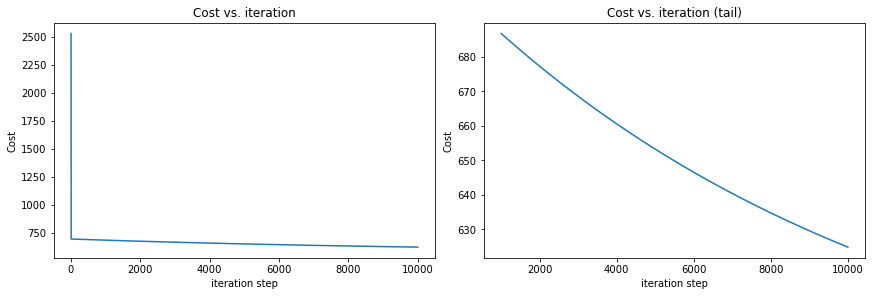

In [101]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()